In [1]:
# imports

import algorithm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set up parabola problem from manuscript

def theta(x):
    return np.array([x])

def alpha(x):
    return np.array([x,x**2])

def jacobian(x):
    return np.array([[1],[2*x]])

def hessian(x):
    return np.array([[[0]],[[2]]])

betastar = np.array([1,2])

bounds = np.array([[-3,3]])

In [3]:
# use provided base chain

with open('parabola-base-chain.txt','r') as file:
    base = np.loadtxt(file)

In [4]:
# run algorithm

ite = algorithm.iteration(betastar, minisize=500, epsilon=7e-2, bounds=bounds)

for i in range(base.size):
    
    ite(theta(base[i]), alpha(base[i]), jacobian(base[i]), hessian=hessian(base[i]))
    
    if i==0:
        samples = ite.samples
        logweights = ite.logweights
    else:
        samples = np.concatenate([samples, ite.samples])
        logweights = np.concatenate([logweights, ite.logweights])

weights = np.exp(logweights)

In [5]:
# set up plotting

def p(x):
    return np.exp(-1/2*(alpha(x)-betastar)@(alpha(x)-betastar))

xvals = np.arange(bounds[0,0], bounds[0,1], 1e-3)

Z = np.sum(np.array(list(map(p, xvals))))*1e-3

pdf = np.array(list(map(p, xvals)))/Z

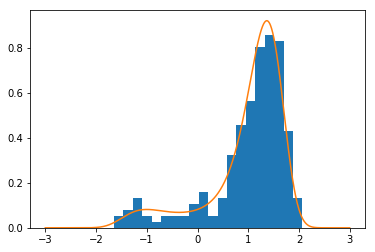

In [6]:
# compare base chain to target distribution

plt.hist(base, 20, density=True)
plt.plot(xvals, pdf)
plt.show()

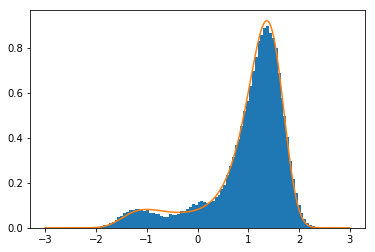

In [7]:
# compare generated samples to target distribution

plt.hist(samples, 100, density=True, weights=weights)
plt.plot(xvals, pdf)
plt.show()